# Machine Data and Learning - Assignment 1

# Task 1

The `LinearRegression().fit()` function returns a line object that best models the set of data passed as parameters to it through linear regression. This best fit linear model is created by minimising the total square error of the training data by  the __gradient descent__ method.

__fit(X, y, sample_weight=None)__

>__Parameters__

    - _X_ {array-like, sparse matrix} of shape (n_samples, n_features) Training data.

    - _y_ {array-like} of shape (n_samples,) or (n_samples, n_targets) Target values. Will be cast to X’s dtype if necessary.

    - _sample_weight_ {array-like} of shape (n_samples,), default=None, Individual weights for each sample.

>__Returns__
selfobject Fitted Estimator.

# Task 2

In [58]:
# Imports
from sklearn.preprocessing import PolynomialFeatures
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from tabulate import tabulate


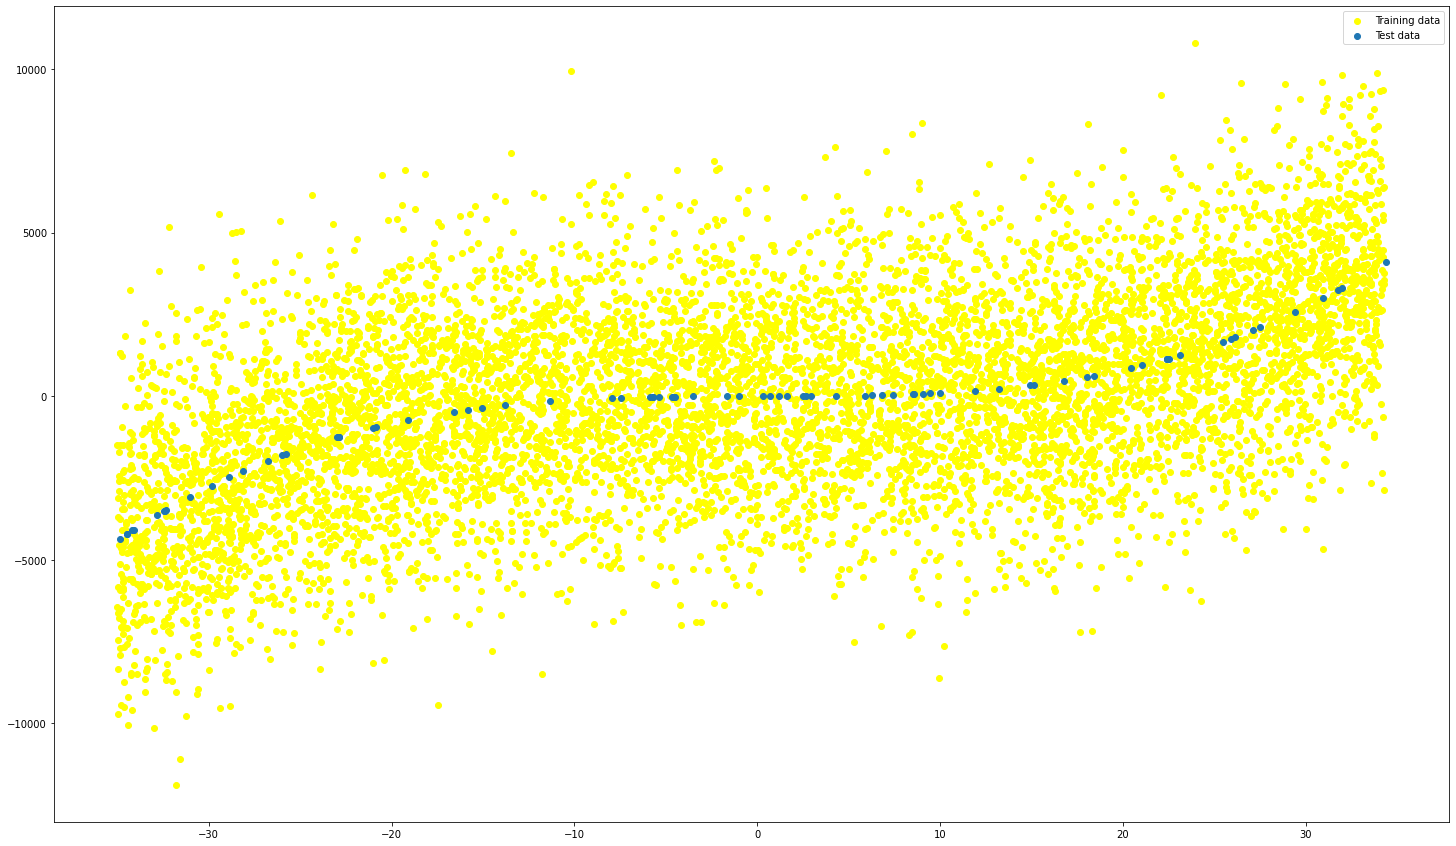

In [59]:
# Reading data from the files
Training_file = open('./data/train.pkl', 'rb')
Test_file = open('./data/test.pkl', 'rb')
trainingDS = pickle.load(Training_file)
test = pickle.load(Test_file)

sections = 2
plt.figure(figsize=(25, 15))
plt.scatter(np.split(trainingDS, sections, axis=1)[0], np.split(
    trainingDS, sections, axis=1)[1], label="Training data", color='yellow')
plt.scatter(np.split(test, sections, axis=1)[0], np.split(
    test, sections, axis=1)[1], label="Test data")
plt.legend()


In [60]:
# Definitions
Min_degree = 1
Max_degree = 15
Number_training_sets = 16
Number_data_points = trainingDS.shape[0]
Number_data_test = int(Number_data_points / Number_training_sets)


In [61]:
# Splitting and sorting of test data
np.random.shuffle(trainingDS)
test = np.sort(test, axis=0)
training = []
for i in range(Number_training_sets):
    training.append(trainingDS[Number_data_test*i: Number_data_test*(i+1)])


In [62]:
# Training of polynomial models
models_arr = [[]]
polynomial_arr = [[]]
for degree in range(Min_degree, Max_degree + 1):
    models_arr.append([])
    polynomial_arr.append([])

    for train_set in range(Number_training_sets):
        poly = PolynomialFeatures(degree)
        x_train, y_train = np.split(training[train_set], sections, axis=1)[
            0], np.split(training[train_set], sections, axis=1)[1]
        x_train = poly.fit_transform(x_train)
        regmodel = LinearRegression().fit(x_train, y_train)
        models_arr[degree].append(regmodel)
        polynomial_arr[degree].append(poly)


In [63]:
# f_hat for each model with the test set
f_hat = [[]]
for degree in range(Min_degree, Max_degree + 1):
    f_hat.append([])
    for train_set in range(Number_training_sets):
        x_test = np.split(test, sections, axis=1)[0]
        x_test = polynomial_arr[degree][train_set].transform(x_test)
        f_hat[degree].append(models_arr[degree][train_set].predict(x_test))


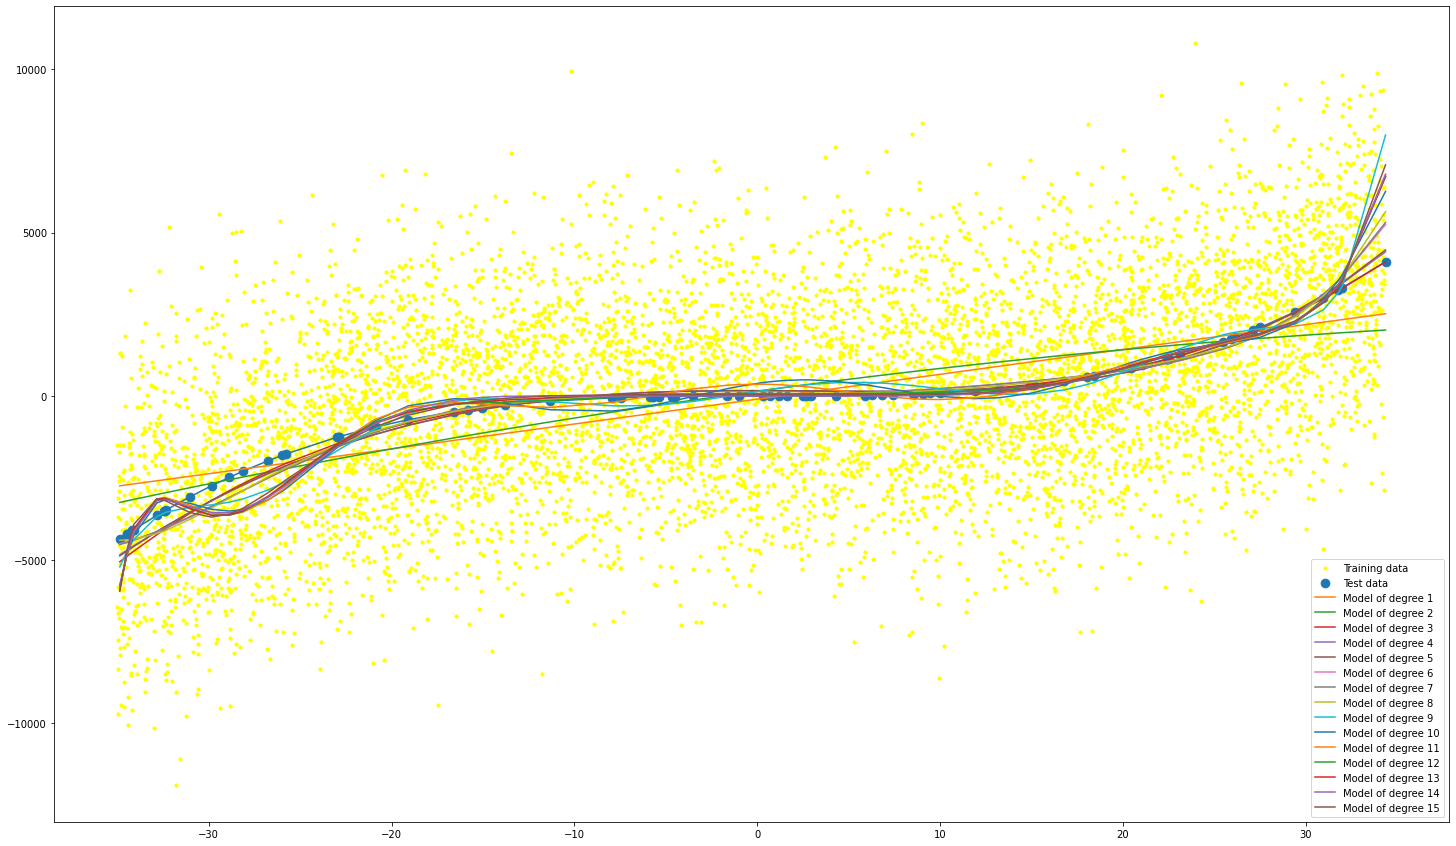

In [64]:
plt.figure(figsize=(25, 15))
plt.scatter(np.split(trainingDS, sections, axis=1)[0], np.split(
    trainingDS, sections, axis=1)[1], label="Training data", color='yellow', s=10)
plt.scatter(np.split(test, sections, axis=1)[0], np.split(
    test, sections, axis=1)[1], label="Test data", s=75)

# Plotting polynomial class models
plt.plot(np.split(test, sections, axis=1)[
         0], np.split(test, sections, axis=1)[1])
for degree in range(Min_degree, Max_degree + 1):
    for train_set in range(1):
        plt.plot(np.split(test, sections, axis=1)[
                 0], f_hat[degree][train_set], label='Model of degree '+str(degree))
plt.legend()


In [65]:
def squared(n):
    return n**2

In [66]:
# Defining lists
arr_bias = []
arr_sq_bias = []
arr_var = []
arr_mse = []

np.set_printoptions(suppress=True)
E_f_hat = [[]]

# E(f_hat)
for degree in range(Min_degree, Max_degree+1):
    E_f_hat.append(np.mean(f_hat[degree], axis=0))

# Finding bias, variance and MSE for every degree
for degree in range(Min_degree, Max_degree+1):
    var = 0
    bias = np.mean((E_f_hat[degree] - np.split(test, sections, axis=1)[1]))
    bias_sq = np.mean(squared(E_f_hat[degree] - np.split(test, sections, axis=1)[1]))
    mse = 0

    # Finding variance and MSE
    for train_set in range(Number_training_sets):
        test_var = np.mean(squared(f_hat[degree][train_set] - E_f_hat[degree]))
        test_mse = np.mean(squared(f_hat[degree][train_set] - np.split(test, sections, axis=1)[1]))
        mse = mse +test_mse
        var = var + test_var
        
    mse = mse / Number_training_sets
    var = var / Number_training_sets
    
    arr_bias.append(bias)
    arr_sq_bias.append(bias_sq)
    arr_var.append(var)
    arr_mse.append(mse)

# tabulation
table = []
for degree in range(Min_degree, Max_degree + 1):
    table.append([degree, arr_bias[degree-1],
                 arr_sq_bias[degree-1], arr_var[degree-1]])
print(tabulate(table, headers=["Degree", "Bias", "Squared bias", "Variance"]))


  Degree       Bias    Squared bias    Variance
--------  ---------  --------------  ----------
       1  159.139         490470        31083.3
       2  156.127         466988        58034.9
       3  -13.8029          5540.73     74217.5
       4  -11.6977          4734.77     83840.9
       5   -9.63745         4345.18     86766.9
       6  -11.7906          4442.5     100139
       7  -10.8688          4670.25    110654
       8  -15.382           4945       142136
       9  -13.9863          5149.61    167501
      10  -14.4413          5220.23    174876
      11  -14.5828          4974.31    184316
      12   -8.66522         9149.51    187587
      13  -15.6021          5965.96    181470
      14  -13.9727         18488       189147
      15  -15.3439          9439.64    190504


### Squared-Bias vs Variance:
For calculating bias, variance, and mean squared error, we have to take mean over all estimators of a single polynomial class f^(x) and calculate the values of bias squared, variance and the mean squared error for each point on each estimator with respect to f^(x). Then we take the mean over all these points to obtain single values. As the degree changes, squared bias decreases, and their variance increases.

### Bias -  

It is a measure of the simplicity of our model. As it measures how far our average estimator value is from the actual function output ( which is test data y) it can tell us if our model is being 'biased' toward being simple and it does not fit the data well. If we increase the degree of the polynomial which we use as an estimator, bias will eventually decrease because the model would fit data better (and become more complex).

### Variance-  

It is a measure on how far a model which is based on a particular realization of the training data is different from the average estimator of that polynomial degree. In case of lower degree polynomials, all the estimators would be centered (i.e not much different from each other) and thus would have low variance. As the model become more and more complex, the realization of the training data has a bigger impact, and thus the variance increases. 

# Task 3

In [67]:
arr_ire = []

# tabulation
table = []
for degree in range(Min_degree, Max_degree + 1):
    arr_ire.append(arr_mse[degree-1] -
                   arr_sq_bias[degree-1] - arr_var[degree-1])
    table.append([degree, arr_ire[degree-1]])
print(tabulate(table, headers=["Degree", "Irreducible error"]))


  Degree    Irreducible error
--------  -------------------
       1          9.45874e-11
       2         -5.09317e-11
       3          1.45519e-11
       4          2.91038e-11
       5          0
       6          0
       7          2.91038e-11
       8          0
       9         -2.91038e-11
      10         -5.82077e-11
      11          2.91038e-11
      12         -5.82077e-11
      13         -2.91038e-11
      14          0
      15         -2.91038e-11


### Irreducible Error
From the table above, the irreducible error values change hardly. Also, they are very near to 0 (some are negative due to python precision errors). For realistic purposes, this could be assumed to be 0. The irreducible error does not  change,because it is a property of the test data. We are assuming that noise is normally distributed, and our irreducible error is sigma squared. This value would be the same among realizations of the testing data, and across polynomial degrees. Looking at the scatterplot, we can see that the test data (in blue) is exactly fitting a polynomial. This leads us to believe that there was a minimal noise which was  introduced in the test data. This also explains us why the observed irreducible error is constant and is very close to 0. 

# Task 4

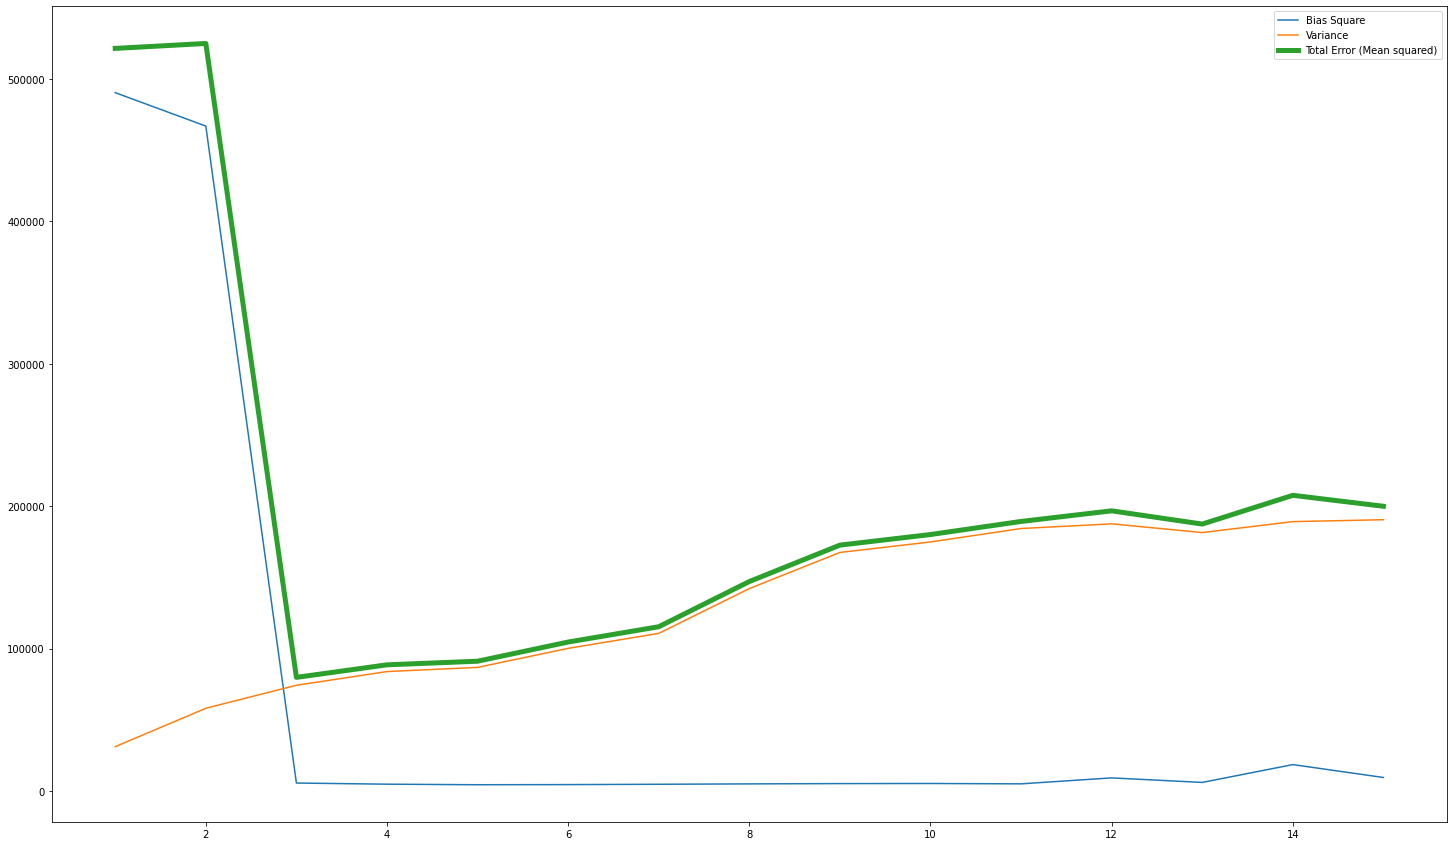

In [68]:
# Bias Square ~ Variance
x = [degree for degree in range(Min_degree, Max_degree + 1)]
plt.figure(figsize=(25, 15))
plt.plot(x, arr_sq_bias, label="Bias Square")
plt.plot(x, arr_var, label="Variance")
plt.plot(x, arr_mse, label="Total Error (Mean squared)", linewidth=5)
plt.legend()


#### From the above Graph, we can say the following:

### Underfitting -
Whenever a model (polynomial degree) has high bias and low variance, it is 'underfitting'. This can be explained by models with low degrees having high biases. This is as they tend to simplify the estimators which are very similar to each other and thus they result in underfitting.

### Overfitting -
Whenever a model (polynomial degree) has high variance and low bias, it is 'overfitting'. This can be explained by models having high degrees and high variances. This is because they tend to create complex estimators which vary significantly from each other and result in overfitting.

>### Note -
>>The lowest error (mean squared) is observed at degree 3. This is not only for this specific run of the training data split. The degree 3 gives the best results consistently. However, degrees from 3 to 6 have acceptable errors, and could be potentially used in estimating the function.

### Comments on the given Dataset  -
The given test set lacks noise and thus it has irreducible error very close to 0 (the total error graph is equal to the bias graph added to the variance graph). We can also say that data given is of degree 3 with respect to the input parameter, as the lowest error is obtained when our degree is 3.
